In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Process data

In [2]:
df = pd.read_csv("data/hourly-rain-in-tra-my.csv").fillna(0)

def split_dates(dates):
    dates_arr = np.zeros(shape=(dates.shape[0], 3), dtype=np.uint16)
    for i in range(dates.shape[0]):
        dates_arr[i, 0], dates_arr[i, 1], dates_arr[i, 2] = dates[i].split("/")
    return dates_arr

dates_arr = split_dates(df["Ngay"].to_numpy()).T
df = df.drop(columns=["Ngay"])

df["days"] = dates_arr[1]
df["months"] = dates_arr[0]
df["years"] = dates_arr[2]

df.columns = ["hours", "rains", "landslide", "days", "months", "years"]
df

,hours,rains,landslide,days,months,years
0,1,0.0,0,1,1,2008
1,2,0.5,0,1,1,2008
2,3,1.0,0,1,1,2008
3,4,0.5,0,1,1,2008
4,5,0.2,0,1,1,2008
...,...,...,...,...,...,...
87667,20,0.0,0,31,12,2017
87668,21,0.0,0,31,12,2017
87669,22,0.0,0,31,12,2017
87670,23,0.0,0,31,12,2017


- Avg rain in 10 years

In [3]:
avg_rain = np.average(df["rains"])
avg_rain

0.5083401770234509

- Avg rain monthly in 10 years

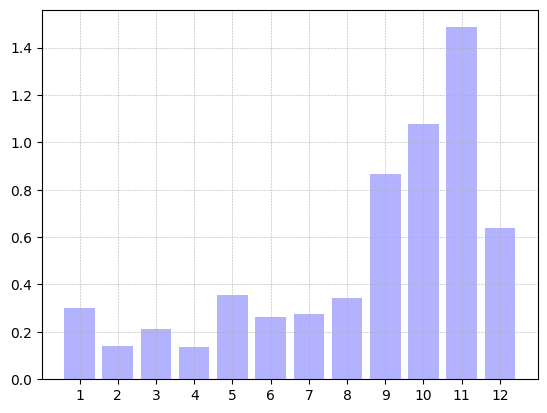

In [6]:
avg_month_rains = np.zeros(12)
for i in range(1, 13):
    idxs = np.where(df["months"]==i)[0]
    avg_month_rains[i-1] = np.average(df["rains"].iloc[idxs])

avg_month_rains
plt.grid(linestyle="--", linewidth=0.4)
plt.bar(x=range(1, 13), height=avg_month_rains, color="blue", alpha=0.3)
plt.xticks(range(1, 13))
# plt.plot(range(1, 13), avg_month_rains, color='blue', linestyle='-', alpha=0.6)
plt.show()

---

- rain and landslides in 10 years

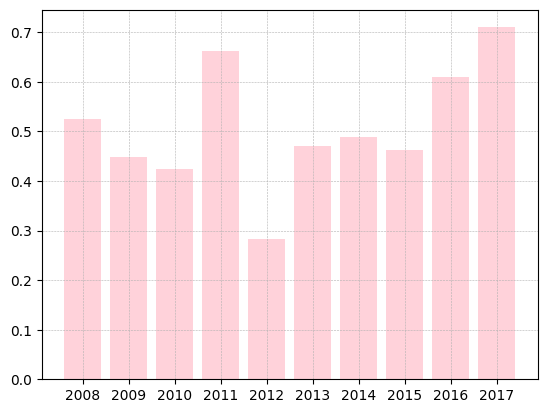

In [9]:
avg_rain_years = np.zeros(10)
count_landslides_year = np.zeros(10)
for i in range(10):
    idxs = np.where(df["years"]==i+2008)[0]
    count_landslides_year[i] = np.sum(df["landslide"].iloc[idxs])
    avg_rain_years[i] = np.average(df["rains"].iloc[idxs])

avg_rain_years
plt.grid(linestyle="--", linewidth=0.4)
plt.bar(x=range(2008, 2018), height=avg_rain_years, color="pink", alpha=0.7)
plt.xticks(range(2008, 2018))
# plt.plot(range(2008, 2018), avg_rain_years, color='red', linestyle='-', alpha=0.6)
plt.show()

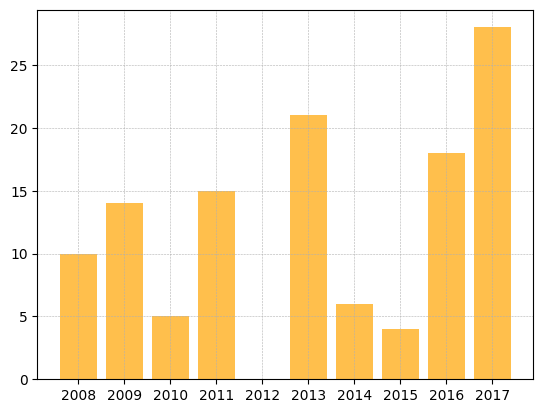

In [14]:
plt.grid(linestyle="--", linewidth=0.4)
plt.bar(x=range(2008, 2018), height=count_landslides_year, color="orange", alpha=0.7)
plt.xticks(range(2008, 2018))
# plt.plot(range(2008, 2018), avg_rain_years, color='red', linestyle='-', alpha=0.6)
plt.show()